**Alumna:** Yanira Sáez Venegas.

    

**Profesor:** Gonzalo Acuña.

**Ayudante:** Ignacio Ibañez.

**Ramo:** Redes Neuronales.

# Capítulo 1: Marco Teórico de las diferentes funciones de activación


La función de activación calcula el estado de una red neuronal, transformando la entrada global en un valor de activación, cuyo rango normalmente va de "0 a 1" o de "-1 a 0". El valor sera "0 o -1" para las neuronas inactivas y "1" para las neuronas activas.

Esto es similar al comportamiento del perceptrón lineal en las redes neuronales. Sin embargo, solo las funciones de activación no lineales permiten que dichas redes calculen problemas no triviales utilizando solo un pequeño número de nodos. En las redes neuronales artificiales, esta función también se denomina función de transferencia.

La función activación, es una función de la entrada global (gini) menos el umbral (Θi). A continuación describiré las 3 funciones de activación más comunes.

**1) Función Lineal**

Los valores de salida obtenidos por medio de esta función de activación serán: a·(gini - Θi), cuando el argumento de (gini - Θi) esté comprendido dentro del rango (-1/a, 1/a). Por encima o por debajo de esta zona se fija la salida en 1 o –1, respectivamente.
![Función Lineal](f1.png)

Básicamente la función de activación se puede describir de la siguiente manera, donde T es el nivel activación escogido:

$t(x)= 0$ , si $x<T$

$t(x)= 1$ , si $x>=T$

**2) Función Sigmoide**

Los valores de salida que proporciona esta función están comprendidos dentro de un rango que va de 0 a 1. Al modificar el valor de g se ve afectada la pendiente de la función de activación. 
![Función Sigmoide](f2.png)

Esta función es comúnmente usada en redes multicapa, como la Backpropagation.


**3) Función Unidad Lineal Rectificada (ReLU)**

La unidad lineal rectificada es la función de activación más comúnmente utilizada en los modelos de aprendizaje profundo. La función devuelve 0 si recibe cualquier entrada negativa, pero para cualquier valor positivo x devuelve ese valor. Entonces puede escribirse como $f(x)=max(0,x)$.

$$ f(x) =\left\{\begin{matrix}
x & si & x\geq 0\\ 
0 & si & x< 0
\end{matrix}\right.$$



**4)Función Tangente Hiperbólica**

Los valores de salida de la función tangente hiperbólica están comprendidos dentro de un rango que va de -1 a 1. Al modificar el valor de g se ve afectada la pendiente de la función de activación. 

![ ](f3.png)



## Código de la primera actividad


Para la primera actividad se selecciono como función lineal ReLU y para la función NO lineal se escogió la función sigmoide, debido a que son las más utilizadas en el ámbito de redes neuronales.

### Con función lineal

In [36]:
class ReLU(object):

    def __init__(self):
        return

    def relu(self, x):
        if x < 0:
            return 0
        if x >= 0:
            return x

    def drelu(self, x):
        if x < 0:
            return 0
        if x >= 0:
            return 1
    
    def function(self, x):
        x = np.vectorize(self.relu)(x)
        return x
    
    def derivate(self, x):
        x = np.vectorize(self.drelu)(x)
        return x

### Con función NO lineal

In [37]:
class Sigmoid(object):
    def __init__(self):
        return
    
    def function(self, x):
        return 1/(1+np.exp(-x))
    
    def derivate(self, x):
        return np.exp(-x)/((1+np.exp(-x))**2) 

# Capítulo 2: Marco Teórico de las diferentes funciones de objetivo


Existen distintos tipos de funciones objetivo, también denominadas funciones de error o costo. A continuación se describen las funciones de costo a utilizar.

**1)Error Cuadrático Medio**

El error cuadrático medio (MSE) es la función de pérdida de regresión más comúnmente utilizada. MSE es la suma de las distancias cuadradas entre nuestra variable objetivo y los valores predichos.








![](E1.png)

**2)Error Absoluto Medio**

El error absoluto medio (MAE) es otra función de pérdida utilizada para los modelos de regresión. MAE es la suma de las diferencias absolutas entre nuestro objetivo y las variables pronosticadas. Entonces, mide la magnitud promedio de errores en un conjunto de predicciones, sin considerar sus direcciones. El rango es de 0 a $∞$.



![ ](E2.png)

## Código de la segunda actividad


### Función objetivo uno: Error Cuadrático Medio

In [41]:
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = (1/(self.inputLayerSize))*sum((y-self.yHat)**2)
        return J

### Función objetivo dos: Error Absoluto Medio

In [42]:
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = (1/(self.inputLayerSize))*sum(abs(y-self.yHat))
        return J


# Capítulo 3: Marco Teórico de la red feedforward


Dependiendo de la arquitectura e interconexión de todas las neuronas de una red, puede clasificársele en distintas categorías, y una de ellas son las redes $Feedforward$. Como su nombre lo indica, en este tipo de redes se empieza con un vector de entradas el cual es equivalente en magnitud al número de neuronas de la primera capa de la red, las cuales procesan dicho vector elemento por elemento en paralelo. La información, modificada por los factores multiplicativos de los pesos en cada neurona, es transmitida hacia delante por la red pasando por las capas ocultas (si hay) para finalmente ser procesada por la capa de salida. Es por eso que este tipo de redes reciben su nombre.

Es importante mencionar que las redes $feedforward$ son las más sencillas en cuanto en implementación y simulación, pero su desempeño es bueno para aplicaciones en los que no se requiera que la red retenga información de eventos pasados como ayuda para evaluar eventos futuros. Cada vector de entrada presentado como entrenamiento para este tipo de redes es una entidad aislada del resto y, al final de dicho período de prueba, la red estará lista para comenzar a identificar y clasificar patrones, reconocer imágenes o cualquier otra aplicación que se le quiera dar.

Al iniciar las investigaciones sobre redes neuronales, las redes $feedforward$ fueron las que recibieron más atención de parte de los investigadores porque sus características en cuanto a tiempos de procesamiento hacían viables simulaciones con los equipos computacionales de la época. Comparadas con las redes, las FFNN ($Feedforwar Neural Network$) son una opción cuyo balance costo-velocidad y costo-exactitud es tal que da mayor ventaja al costo que a los otros parámetros.

En este tipo de redes no existen interconexiones entre capas más allá de la conexión directa hacia delante para propagar la información. No hay rutas de retroalimentación para desempeñar la función de memoria de la red. A continuación un ejemplo de una red neuronal Feedforward con una capa oculta con 3 neuronas.

![Función MSE](F.png)


## Código de la tercera y cuarta actividad


### Sigmoide y funcion de costo 1 para compuerta lógica AND


Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33


Text(0,0.5,'Costo')

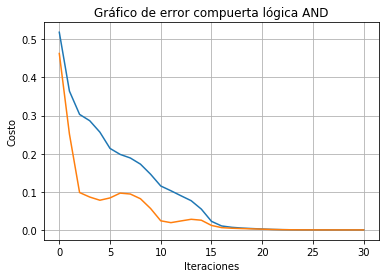

In [90]:
## ----------------------- Part 1 ---------------------------- ##
import numpy as np
import matplotlib.pyplot as plt

# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([0,0], [0,1], [1,0], [1,1]), dtype=float)
y = np.array(([1], [1], [1], [0]), dtype=float)

Xtest = np.array(([0,0], [0,1], [1,0]), dtype=float)
ytest = np.array(([1], [1], [1]), dtype=float)

# Normalize
X = X
y = y  #Max test score is 100

## -------------------- Activation Functions ----------------- ##

class Sigmoid(object):
    def __init__(self):
        return
    
    def function(self, x):
        return 1/(1+np.exp(-x))
    
    def derivate(self, x):
        return np.exp(-x)/((1+np.exp(-x))**2)        
        
class ReLU(object):

    def __init__(self):
        return

    def relu(self, x):
        if x < 0:
            return 0
        if x >= 0:
            return x

    def drelu(self, x):
        if x < 0:
            return 0
        if x >= 0:
            return 1
    
    def function(self, x):
        x = np.vectorize(self.relu)(x)
        return x
    
    def derivate(self, x):
        x = np.vectorize(self.drelu)(x)
        return x

## ----------------------- Loss Functions -------------------- ##
    

class Neural_NetworkMSE(object):
    def __init__(self, inputLayerSize, outputLayerSize, hiddenLayerSize, activationFunction):        
        #Define Hyperparameters
        self.inputLayerSize = inputLayerSize
        self.outputLayerSize = outputLayerSize
        self.hiddenLayerSize = hiddenLayerSize
        self.activationFunction = activationFunction
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.activationFunction.function(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.activationFunction.function(self.z3) 
        return yHat
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = (1/(self.inputLayerSize))*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.activationFunction.derivate(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.activationFunction.derivate(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

class Neural_NetworkAE(object):
    def __init__(self, inputLayerSize, outputLayerSize, hiddenLayerSize, activationFunction):        
        #Define Hyperparameters
        self.inputLayerSize = inputLayerSize
        self.outputLayerSize = outputLayerSize
        self.hiddenLayerSize = hiddenLayerSize
        self.activationFunction = activationFunction
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.activationFunction.function(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.activationFunction.function(self.z3) 
        return yHat
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = (1/(self.inputLayerSize))*sum(abs(y-self.yHat))
        return J

    def dabs(self, y, yHat):
        if y > yHat:
            return 0
        if y < yHat:
            return 1
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        v = np.vectorize(self.dabs)(y,self.yHat)
        
        delta3 = np.multiply(-(v), self.activationFunction.derivate(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.activationFunction.derivate(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad
        
## ----------------------- Part 6 ---------------------------- ##
from scipy import optimize


class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        self.testJ.append(self.N.costFunction(self.testX, self.testY))
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, trainX, trainY, testX, testY):
        #Make an internal variable for the callback function:
        self.X = trainX
        self.y = trainY
        
        self.testX = testX
        self.testY = testY

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res



S = Sigmoid()
R = ReLU()
NN = Neural_NetworkMSE(2, 1, 3, S) #mean square error y sigmoide
NN2 = Neural_NetworkAE(2, 1, 3, S) #absolute error y sigmoide
NN3 = Neural_NetworkMSE(2, 1, 3, R) #mean square error y relu
NN4 = Neural_NetworkAE(2, 1, 3, R) #absolute error y relu
T = trainer(NN)
T.train(X,y, Xtest, ytest)
#T2 = trainer(NN2)
#T2.train(X,y, Xtest, ytest)
#T3 = trainer(NN3)
#T3.train(X,y)
#T4 = trainer(NN4)
#T4.train(X,y)

plt.plot(T.J)
plt.plot(T.testJ)
plt.grid(1)
plt.title('Gráfico de error compuerta lógica AND')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')

### Sigmoide y funcion de costo 1 para compuerta lógica OR


Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27


Text(0,0.5,'Costo')

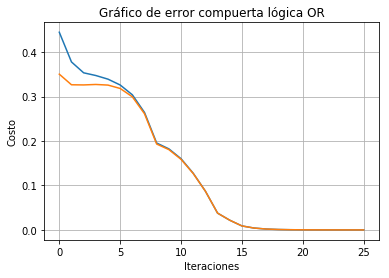

In [91]:
## ----------------------- Part 1 ---------------------------- ##
import numpy as np
import matplotlib.pyplot as plt

# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([0,0], [0,1], [1,0], [1,1]), dtype=float)
y = np.array(([1], [0], [0], [0]), dtype=float)

Xtest = np.array(([0,0], [0,1], [1,0]), dtype=float)
ytest = np.array(([1], [0], [0]), dtype=float)

# Normalize
X = X
y = y  #Max test score is 100

## -------------------- Activation Functions ----------------- ##

class Sigmoid(object):
    def __init__(self):
        return
    
    def function(self, x):
        return 1/(1+np.exp(-x))
    
    def derivate(self, x):
        return np.exp(-x)/((1+np.exp(-x))**2)        
        
class ReLU(object):

    def __init__(self):
        return

    def relu(self, x):
        if x < 0:
            return 0
        if x >= 0:
            return x

    def drelu(self, x):
        if x < 0:
            return 0
        if x >= 0:
            return 1
    
    def function(self, x):
        x = np.vectorize(self.relu)(x)
        return x
    
    def derivate(self, x):
        x = np.vectorize(self.drelu)(x)
        return x

## ----------------------- Loss Functions -------------------- ##
    

class Neural_NetworkMSE(object):
    def __init__(self, inputLayerSize, outputLayerSize, hiddenLayerSize, activationFunction):        
        #Define Hyperparameters
        self.inputLayerSize = inputLayerSize
        self.outputLayerSize = outputLayerSize
        self.hiddenLayerSize = hiddenLayerSize
        self.activationFunction = activationFunction
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.activationFunction.function(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.activationFunction.function(self.z3) 
        return yHat
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = (1/(self.inputLayerSize))*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.activationFunction.derivate(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.activationFunction.derivate(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

class Neural_NetworkAE(object):
    def __init__(self, inputLayerSize, outputLayerSize, hiddenLayerSize, activationFunction):        
        #Define Hyperparameters
        self.inputLayerSize = inputLayerSize
        self.outputLayerSize = outputLayerSize
        self.hiddenLayerSize = hiddenLayerSize
        self.activationFunction = activationFunction
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.activationFunction.function(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.activationFunction.function(self.z3) 
        return yHat
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = (1/(self.inputLayerSize))*sum(abs(y-self.yHat))
        return J

    def dabs(self, y, yHat):
        if y > yHat:
            return 0
        if y < yHat:
            return 1
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        v = np.vectorize(self.dabs)(y,self.yHat)
        
        delta3 = np.multiply(-(v), self.activationFunction.derivate(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.activationFunction.derivate(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad
        
## ----------------------- Part 6 ---------------------------- ##
from scipy import optimize


class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        self.testJ.append(self.N.costFunction(self.testX, self.testY))
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, trainX, trainY, testX, testY):
        #Make an internal variable for the callback function:
        self.X = trainX
        self.y = trainY
        
        self.testX = testX
        self.testY = testY

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res



S = Sigmoid()
R = ReLU()
NN = Neural_NetworkMSE(2, 1, 3, S) #mean square error y sigmoide
NN2 = Neural_NetworkAE(2, 1, 3, S) #absolute error y sigmoide
NN3 = Neural_NetworkMSE(2, 1, 3, R) #mean square error y relu
NN4 = Neural_NetworkAE(2, 1, 3, R) #absolute error y relu
T = trainer(NN)
T.train(X,y, Xtest, ytest)
#T2 = trainer(NN2)
#T2.train(X,y, Xtest, ytest)
#T3 = trainer(NN3)
#T3.train(X,y)
#T4 = trainer(NN4)
#T4.train(X,y)

plt.plot(T.J)
plt.plot(T.testJ)
plt.grid(1)
plt.title('Gráfico de error compuerta lógica OR')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')

### Sigmoide y funcion de costo 1 para compuerta lógica XOR


Optimization terminated successfully.
         Current function value: 0.250004
         Iterations: 41
         Function evaluations: 54
         Gradient evaluations: 54


Text(0,0.5,'Costo')

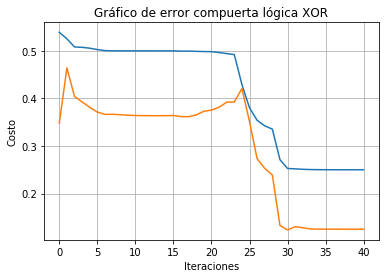

In [47]:
## ----------------------- Part 1 ---------------------------- ##
import numpy as np
import matplotlib.pyplot as plt

# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([0,0], [0,1], [1,0], [1,1]), dtype=float)
y = np.array(([1], [0], [0], [1]), dtype=float)

Xtest = np.array(([0,0], [0,1], [1,0]), dtype=float)
ytest = np.array(([1], [0], [1]), dtype=float)

# Normalize
X = X
y = y  #Max test score is 100

## -------------------- Activation Functions ----------------- ##

class Sigmoid(object):
    def __init__(self):
        return
    
    def function(self, x):
        return 1/(1+np.exp(-x))
    
    def derivate(self, x):
        return np.exp(-x)/((1+np.exp(-x))**2)        
        
class ReLU(object):

    def __init__(self):
        return

    def relu(self, x):
        if x < 0:
            return 0
        if x >= 0:
            return x

    def drelu(self, x):
        if x < 0:
            return 0
        if x >= 0:
            return 1
    
    def function(self, x):
        x = np.vectorize(self.relu)(x)
        return x
    
    def derivate(self, x):
        x = np.vectorize(self.drelu)(x)
        return x

## ----------------------- Loss Functions -------------------- ##
    

class Neural_NetworkMSE(object):
    def __init__(self, inputLayerSize, outputLayerSize, hiddenLayerSize, activationFunction):        
        #Define Hyperparameters
        self.inputLayerSize = inputLayerSize
        self.outputLayerSize = outputLayerSize
        self.hiddenLayerSize = hiddenLayerSize
        self.activationFunction = activationFunction
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.activationFunction.function(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.activationFunction.function(self.z3) 
        return yHat
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = (1/(self.inputLayerSize))*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.activationFunction.derivate(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.activationFunction.derivate(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

class Neural_NetworkAE(object):
    def __init__(self, inputLayerSize, outputLayerSize, hiddenLayerSize, activationFunction):        
        #Define Hyperparameters
        self.inputLayerSize = inputLayerSize
        self.outputLayerSize = outputLayerSize
        self.hiddenLayerSize = hiddenLayerSize
        self.activationFunction = activationFunction
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.activationFunction.function(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.activationFunction.function(self.z3) 
        return yHat
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = (1/(self.inputLayerSize))*sum(abs(y-self.yHat))
        return J

    def dabs(self, y, yHat):
        if y > yHat:
            return 0
        if y < yHat:
            return 1
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        v = np.vectorize(self.dabs)(y,self.yHat)
        
        delta3 = np.multiply(-(v), self.activationFunction.derivate(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.activationFunction.derivate(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad
        
## ----------------------- Part 6 ---------------------------- ##
from scipy import optimize


class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        self.testJ.append(self.N.costFunction(self.testX, self.testY))
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, trainX, trainY, testX, testY):
        #Make an internal variable for the callback function:
        self.X = trainX
        self.y = trainY
        
        self.testX = testX
        self.testY = testY

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res



S = Sigmoid()
R = ReLU()
NN = Neural_NetworkMSE(2, 1, 3, S) #mean square error y sigmoide
NN2 = Neural_NetworkAE(2, 1, 3, S) #absolute error y sigmoide
NN3 = Neural_NetworkMSE(2, 1, 3, R) #mean square error y relu
NN4 = Neural_NetworkAE(2, 1, 3, R) #absolute error y relu
T = trainer(NN)
T.train(X,y, Xtest, ytest)
#T2 = trainer(NN2)
#T2.train(X,y, Xtest, ytest)
#T3 = trainer(NN3)
#T3.train(X,y)
#T4 = trainer(NN4)
#T4.train(X,y)

plt.plot(T.J)
plt.plot(T.testJ)
plt.grid(1)
plt.title('Gráfico de error compuerta lógica XOR')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')

## Análisis de los resultados obtenidos


Los gráficos muestran el error del testing y el error del training, y a medida que se va iterando, se va acercando cada vez más a 0 lo que significa que el modelo cada vez hace mejores predicciones. En el caso de la compuerta lógica AND ocurre aproximadamente en la iteración 15, en la compuerta OR ocurre aproximadamente en la iteración 8, finalmente, en la compuerta lógica XOR no se logra reducir el sobreajuste en este conjunto de datos.


# Capítulo 4: Dataset Wine


## Descripción del dataset escogido

El dataset escogido es el wine un dataset de clasificación del área de la física donado por Stefan Aeberhard el año 1991. De características multivariable, con 178 muestras en total, de dimensionalidad 13, es decir, 13 atributos que poseen características de entero y reales, y son los siguientes:
1. Alcohol
2. Ácido málico
3. Ceniza
4. Alcalinidad de ceniza
5. Magnesio
6. Fenoles totales
7. Flavonoides
8. Fenoles no flavonoides
9. Proantocianidinas
10. Intensidad de color 
11. Hue
12. OD280/0D315 de vinos diluidos
13. Prolina

Además posee 3 clases, conformada por la clase 0 con 59 muestras, la clase 1 con 71 muestras y la clase 2 con 48 muestras.


## Código de la quinta y sexta actividad


In [72]:
## ----------------------- DataSETS ---------------------------- ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix

wine = datasets.load_wine()
x_train = wine.data
y = wine.target
y_train = np.zeros([len(y), 1])
for i in range(len(y)):
    y_train[i][0] = y[i]

x_train = normalize(x_train)

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3)
print('Train size: {train}, Test size: {test}'.format(train=x_train.shape[0], test=x_test.shape[0]))

print(x_train)
print(y_train)

## -------------------- Activation Functions ----------------- ##

class Sigmoid(object):
    def __init__(self):
        return
    
    def function(self, x):
        return 1/(1+np.exp(-x))
    
    def derivate(self, x):
        return np.exp(-x)/((1+np.exp(-x))**2)        
        
class ReLU(object):

    def __init__(self):
        return

    def relu(self, x):
        if x < 0:
            return 0
        if x >= 0:
            return x

    def drelu(self, x):
        if x < 0:
            return 0
        if x >= 0:
            return 1
    
    def function(self, x):
        x = np.vectorize(self.relu)(x)
        return x
    
    def derivate(self, x):
        x = np.vectorize(self.drelu)(x)
        return x

## ----------------------- Loss Functions -------------------- ##
    

class Neural_NetworkMSE(object):
    def __init__(self, inputLayerSize, outputLayerSize, hiddenLayerSize, activationFunction):        
        #Define Hyperparameters
        self.inputLayerSize = inputLayerSize
        self.outputLayerSize = outputLayerSize
        self.hiddenLayerSize = hiddenLayerSize
        self.activationFunction = activationFunction
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.activationFunction.function(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.activationFunction.function(self.z3) 
        return yHat
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = (1/(self.inputLayerSize))*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.activationFunction.derivate(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.activationFunction.derivate(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

class Neural_NetworkAE(object):
    def __init__(self, inputLayerSize, outputLayerSize, hiddenLayerSize, activationFunction):        
        #Define Hyperparameters
        self.inputLayerSize = inputLayerSize
        self.outputLayerSize = outputLayerSize
        self.hiddenLayerSize = hiddenLayerSize
        self.activationFunction = activationFunction
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.activationFunction.function(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.activationFunction.function(self.z3) 
        return yHat
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = (1/(self.inputLayerSize))*sum(abs(y-self.yHat))
        return J

    def dabs(self, y, yHat):
        if y > yHat:
            return 0
        if y < yHat:
            return 1
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        v = np.vectorize(self.dabs)(y,self.yHat)
        
        delta3 = np.multiply(-(v), self.activationFunction.derivate(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.activationFunction.derivate(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad
        
## ----------------------- Part 6 ---------------------------- ##
from scipy import optimize


class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        self.testJ.append(self.N.costFunction(self.testX, self.testY))
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, trainX, trainY, testX, testY):
        #Make an internal variable for the callback function:
        self.X = trainX
        self.y = trainY
        
        self.testX = testX
        self.testY = testY

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

S = Sigmoid()
#R = ReLU()
NN = Neural_NetworkMSE(13, 1, 3, S)
#NN2 = Neural_NetworkAE(13, 1, 3, S)
T = trainer(NN)
T.train(x_train,y_train, x_test, y_test)
#T2 = trainer(NN2)
#T2.train(X,y)

Train size: 124, Test size: 54
[[9.31402906e-03 1.42682998e-03 1.51930971e-03 ... 8.25711797e-04
  2.09400512e-03 9.97459850e-01]
 [1.11208007e-02 1.49314247e-03 2.11528516e-03 ... 8.32115853e-04
  2.06084767e-03 9.95428310e-01]
 [9.27438445e-03 1.20605695e-03 1.53498157e-03 ... 7.73940288e-04
  1.93485072e-03 9.97738021e-01]
 ...
 [1.50502520e-02 2.06167836e-03 3.03826285e-03 ... 1.35636734e-03
  3.68931917e-03 9.92860894e-01]
 [1.75907905e-02 1.23953097e-03 3.11201391e-03 ... 1.34502296e-03
  2.54499443e-03 9.88987473e-01]
 [1.69769972e-02 3.00452012e-03 3.58792208e-03 ... 1.45850491e-03
  4.01088851e-03 9.91783340e-01]]
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [2.]
 [2.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [0.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [0.]
 [2.]
 [1.]
 [2.]
 [0.]
 [2.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [0.]
 [0.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [2.]
 [2.]
 [0.]
 [0.]
 [0.]
 [1

## Presentación gráfica de número de iteraciones vs error en el conjunto de train en el mejor modelo

Text(0,0.5,'Costo')

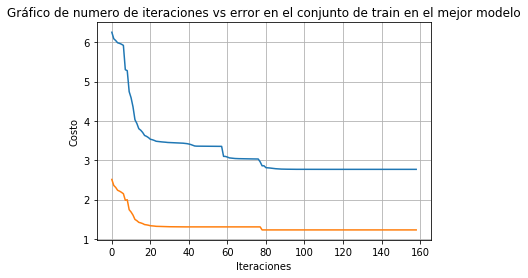

In [73]:

plt.plot(T.J)
plt.plot(T.testJ)
plt.grid(1)
plt.title('Gráfico de numero de iteraciones vs error en el conjunto de train en el mejor modelo')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')

## Análisis de los resultados obtenidos


En el modelo se observa a que el error de test y el error de training nunca se acercan ambos a cero.


# Capítulo 4: Conclusiones

Se logró obtener un mayor conocimiento sobre la red neuronal feedforward, con la ayuda de la teoría vista en clases en conjunto con la investigación para la realización de este laboratorio, se completaron con éxito casi todos los objetivos de este, ya que no se logro realizar la matriz de confusión del mejor modelo. También se profundizó el conocimiento en el uso de jupyter notebook y las librerías de Python para facilitar la visualización de los resultados de manera gráfica.



# Capítulo 5: Referencias

1. Salcedo, L. (2018). Mi diario Python. Recuperado 17 julio, 2018, de http://www.pythondiario.com/2018/07/introduccion-las-redes-neuronales-parte_12.html?m=1
2. Grover, P. (2018, 5 junio). 5 Regression Loss Functions All Machine Learners Should Know. Recuperado 17 julio, 2018, de https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0

3. Gupta, V. (2017, 9 octubre). Understanding Feedforward Neural Networks. Recuperado 17 julio, 2018, de https://www.learnopencv.com/understanding-feedforward-neural-networks/

4. Oropeza, C. (2007, 15 mayo). http://catarina.udlap.mx/u_dl_a/tales/documentos/lem/oropeza_c_ca/capitulo3.pdf. Recuperado 17 julio, 2018, de http://catarina.udlap.mx/u_dl_a/tales/documentos/lem/oropeza_c_ca/capitulo3.pdf

5. Welch, S. (2014, 6 febrero). Supporting code for short YouTube series Neural Networks Demystified.. Recuperado 17 julio, 2018, de https://github.com/stephencwelch/Neural-Networks-Demystified
